### Use o programa desenvolvido em sala de aula, e aplique para resolver um problema de aproximação de dados considerando n=3. Para seu teste, use dados discretos que estejam distribuídos em uma forma "parabólica".
#### b: eixo das ordenadas
#### t: eixo das abscissas
#### Estamos em busca dos valores dos coeficientes x0, x1, x2 da equação da parábola: b(t) = 1.x0 + t.x1 + t².x2 que melhor descreve o comportamento dos dados discretos.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def mmq(U, y): #função para resolução do M.M.Q, sendo que A é uma matriz onde a coluna j é dada por ti^j, e b é um vetor composto pelos valores das ordenadas (o y de cada ponto)
    B = U.T.dot(U) #chama-se de B, a matriz resultante da multiplicação A(transposta) por A.
    c = U.T.dot(y) #chama-se de y, a matriz resultante da multiplicação A(transposta) por b.
    a = np.linalg.solve(B, c) #chama-se de x, o vetor resultante da solução do sistema linear (Bx = y), ou seja, estamos resolvento Bx=A(transposta)b
    return a #retornando o vetor resultante, esse vetor possui o valor dos coeficientes que estamos procurando

In [3]:
def aprox_dados(x, y, n):                 #método para realizar uma aproximação de dados, t é um vetor composto pelos valores das abscissas (o x de cada ponto), b é um vetor composto pelos valores das ordenadas (o y de cada ponto), e n é o grau de aproximação (se for uma reta, n=2, se for uma parábola, n=3) 
    m = x.shape[0]                        #t.shape retorna uma tupla com a quantidade de elementos que t possui, logo vamos acessar esse valor por essa instrução
    U = np.ones([m, n])                   #cria uma matriz de 1 (real) com dimensão m por n
    x = x.reshape([m])                    #reshape cria um novo array sem alterar seu valor, apenas sua organização de linas e colunas, nesse caso estamos apenas copiando
    for j in range(1, n):                 #temos que A será aquela matriz onde a coluna j é dada por ti^j
        U[:,j] = np.multiply(U[:,j-1], x) #para formar essa matriz, basta colocar na coluna j o valor da multiplicação da coluna anterior por t
    a = mmq(U, y)                         #agora basta resolver o sistema pelo MMQ
    return a                              #retornando o vetor resultante, esse vetor possui o valor dos coeficientes que estamos procurando

## Exercício 7.7 (Neide Franco) n=3 parábola


In [4]:
x1 = np.array([-3, -1, 1, 2, 3])
y1 = np.array([-1, 0, 1, 1, -1])

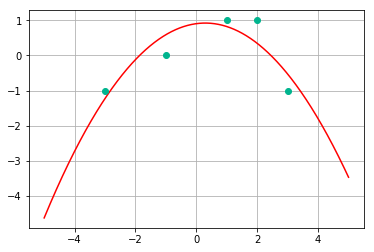

In [5]:
x1 = np.array([-3, -1, 1, 2, 3])
y1 = np.array([-1, 0, 1, 1, -1])

result = aprox_dados(x1, y1, 3)
x = np.linspace(-5, 5, 10000)
plt.plot(x, result[0] + result[1]*x + result[2]*(x**2), linestyle='-', color = 'red')
plt.plot(x1, y1, 'o', color = '#00b48e')
plt.grid()
plt.show()

## Exercício 7.9 (Neide Franco) n=3 parábola

In [6]:
t2 = np.array([-2, -1, 0, 1, 2])
b2 = np.array([6, 3, -1, 2, 4])

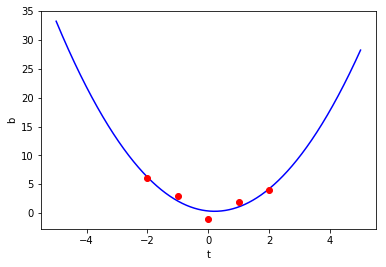

In [7]:
result = aprox_dados(t2, b2, 3)
x = np.linspace(-5, 5, 10000)
plt.plot(x, result[0] + result[1]*x + result[2]*(x**2), linestyle='-', color='blue')
plt.plot(t2, b2, 'o', color='red')
plt.ylabel('b')
plt.xlabel('t')
plt.show()

## Exercício 2 (Classroom) n=3 parábola

In [8]:
t4 = np.array([2.0774, 2.3049, 3.0125, 4.7092, 5.5016, 5.8704, 6.2248, 8.4431, 8.7594, 9.3900])
b4 = np.array([2.7212, 3.7798, 4.8774, 6.6596, 10.5966, 9.8786, 10.5232, 23.3574, 24.0510, 27.4827], dtype=np.float)

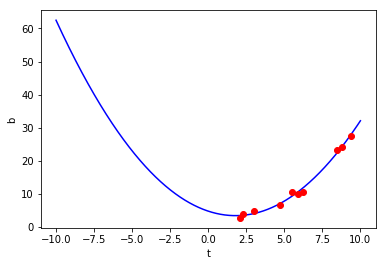

In [9]:
result = aprox_dados(t4, b4, 3)
x = np.linspace(-10, 10, 10000)
plt.plot(x, result[0] + result[1]*x + result[2]*(x**2), linestyle='-', color='blue')
plt.plot(t4, b4, 'o', color='red')
plt.ylabel('b')
plt.xlabel('t')
plt.show()